<a href="https://colab.research.google.com/github/rgoding2004/w207/blob/main/Ryan_Goding_project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Poisonous Mushrooms

**Solution**

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

## Grading
---
- Make sure to answer every part in every question.
 - There are 6 equally weighted questions.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean and well commented, 
   - and if the functions or answers are too long.

 ## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

In [ ]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [ ]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [ ]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [ ]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Question 1:PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

Notes:
* The pandas DataFrame [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html) function may be helpful.
* You can use `PCA` to produce a PCA analysis.

The fraction of total variance for the 1th component is: 0.16404
The fraction of total variance for the 2th component is: 0.13323
The fraction of total variance for the 3th component is: 0.10173
The fraction of total variance for the 4th component is: 0.07063
The fraction of total variance for the 5th component is: 0.03867
The fraction of total variance for the 10th component is: 0.02231
The fraction of total variance for the 20th component is: 0.01146
The fraction of total variance for the 30th component is: 0.00700
The fraction of total variance for the 40th component is: 0.00440
The fraction of total variance for the 50th component is: 0.00204




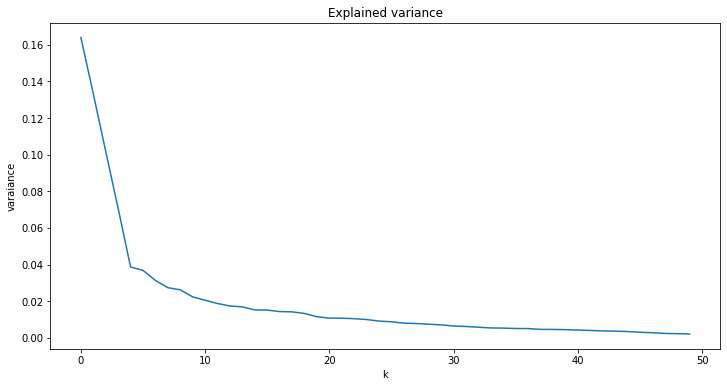

In [ ]:
def P1():
    ## STUDENT START ###
    #create PCA object
  pca = PCA(n_components=50)
  pca.fit(train_data)
  explained_variance = pca.explained_variance_ratio_
  principal_components = [1,2,3,4,5,10,20,30,40,50]
  #for loop to print fraction of total variance for k components
  for k in principal_components:
    print('The fraction of total variance for the ' + str(k) + 'th component is: ' + '%.5f' % explained_variance[k-1])
  #plt figure
  print('\n')
  plt.figure(figsize=(12, 6))
  plt.plot(explained_variance)
  plt.title('Explained variance')
  plt.xlabel('k')
  plt.ylabel('varaiance')
    ## STUDENT END ###

P1()

### Question 2: PCA for visualization

PCA can be very useful for visualizing data. 
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.
* Be sure to add a title, axis labels and a legend to your graph.

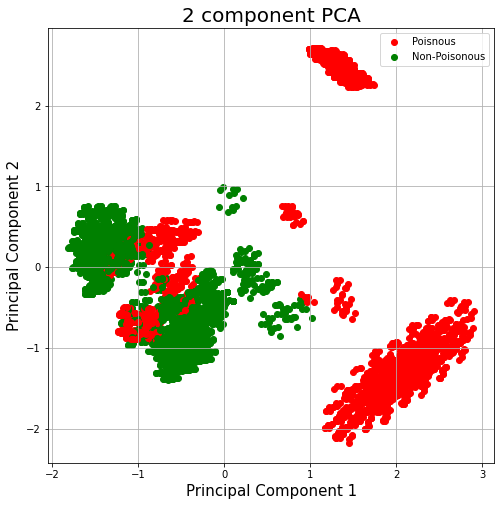

In [ ]:
def Q2():   
  ### STUDENT START ###
  #create PCA object
  pca2 = PCA(n_components=2)
  main_components = pca2.fit_transform(train_data)
  #red for poisonous, label 1 and green for non-poisnous, label 0
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  legend = ['Poisnous', 'Non-Poisonous']

  for i in range(len(main_components)):
    if train_labels[i] == 0:
      ax.scatter(main_components[i][0], main_components[i][1], c = 'green')
    else:
      ax.scatter(main_components[i][0], main_components[i][1], c = 'red')
  ax.legend(legend)
  ax.grid()
  ### STUDENT END ###

Q2()

### Question 3: Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data. 
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

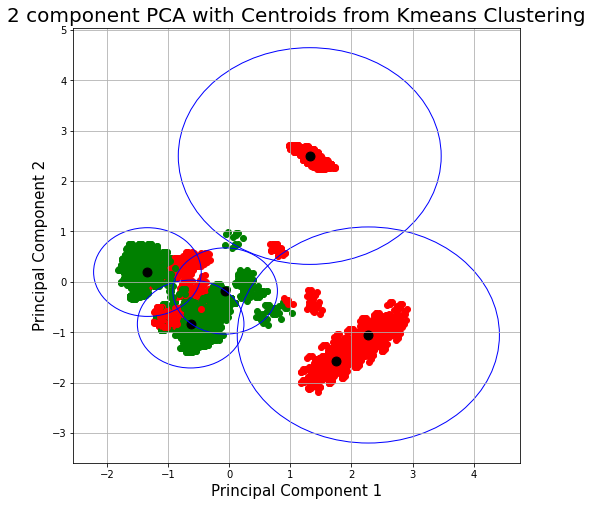

In [ ]:
def Q3():   
  ### STUDENT START ###
  #create PCA object
  pca3 = PCA(n_components=2)
  main_components = pca3.fit_transform(train_data)
  #PCA for test_data
  test_comp = pca3.fit_transform(test_data)
  #fit a k-means cluster model with 6 clusters using the reduced and transformed data
  kmeans = KMeans(n_clusters = 6).fit(main_components)
  #predict labels using kmeans
  predict_list = []
  predict_list = kmeans.predict(test_comp)
  #centroids for clusters
  centroids = kmeans.cluster_centers_
  #create main plot
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA with Centroids from Kmeans Clustering', fontsize = 20)
  legend = ['Poisnous', 'Non-Poisonous']
  #create scatter plot for poisonous and non-poisnous
  for i in range(len(main_components)):
      if train_labels[i] == 0:
        ax.scatter(main_components[i][0], main_components[i][1], c = 'green')
      else:
        ax.scatter(main_components[i][0], main_components[i][1], c = 'red')
  #plot centroids for six clusters from kmeans
  ax.scatter(centroids[:,0], centroids[:,1], s = 80, color = 'k')

  #plot circles with largest distance from centroids
  max_distance =0
  #check each cluster
  for j in range(6):
    #check each label from kmeans prediction
    for i in range(len(predict_list)):
        if predict_list[i] ==j:
          temp_distance = np.linalg.norm(centroids[j]- main_components[i])
          #if largest than any previous distance store in max_distance
          if temp_distance > max_distance:
            max_distance = temp_distance
          else:
            continue
    #plot circle 
    circle = plt.Circle((centroids[j]), max_distance/2, color = 'b', fill = False)
    ax.add_patch(circle)
    max_distance = 0 
  ax.grid()
  ### STUDENT END ###

Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. 
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours. 
    - Each row showing a different number of mixture components. 
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

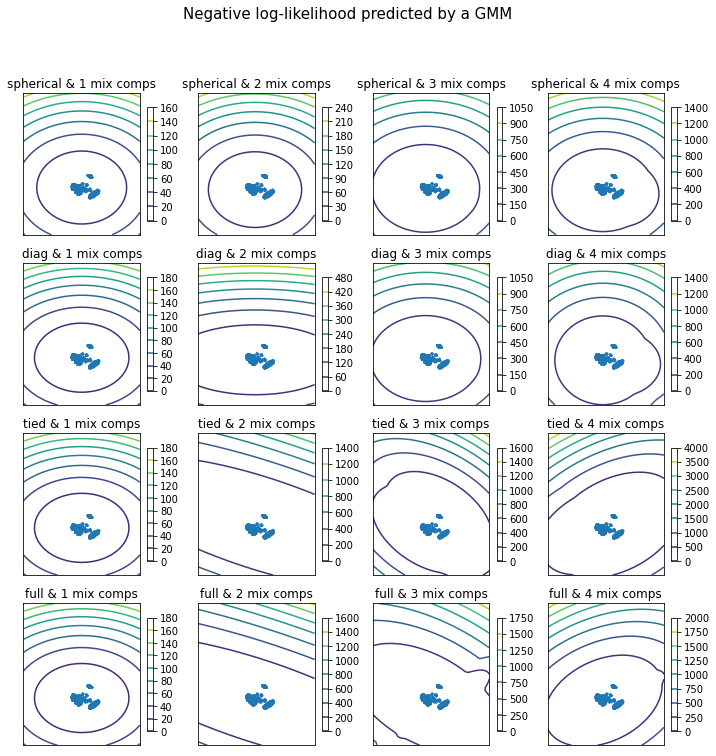

In [ ]:
def Q4():
    ### STUDENT START ###
    #create PCA object
    pca4 = PCA(n_components=2)
    main_components = pca4.fit_transform(train_data)
    clf = GaussianMixture(n_components = 1, covariance_type = 'spherical', random_state = 12345)
    clf.fit(main_components)
    #create large plot for smaller subplots
    plt.figure(figsize = (12,12))
    plt.suptitle("Negative log-likelihood predicted by a GMM", fontsize = 15)
    #list of mixture components
    mixture_comps = [1,2,3,4]
    #list of covariance matrix types
    cov_type = ['spherical', 'diag', 'tied', 'full']
    #subplot counter
    i = 0
    #for loop for colums
    for matrix_type in cov_type:
      for mixture in mixture_comps:
        plt.subplot(4,4,i+1)
        plt.subplot(4,4,i+1).set_title(str(matrix_type)  + ' & ' +str(mixture) + ' mix comps')  
        #each subplot should not have ticks or grid
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        #create gaussianmixture object 
        clf = GaussianMixture(n_components = mixture, covariance_type = matrix_type, random_state = 12345)
        clf.fit(main_components)

        x = np.linspace(-10.0, 10.0)
        y = np.linspace(-10.0, 20.0)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -clf.score_samples(XX)
        Z = Z.reshape(X.shape)

        CS = plt.contour(
            X, Y, Z
        )
        CB = plt.colorbar(CS, shrink=0.8, extend="both")
        plot = plt.scatter(main_components[:, 0], main_components[:, 1], 0.8)
        i+=1
    plt.show()
    ### STUDENT END ###

Q4()

Answer:  With the full covariance type only the covariance matrix is symmetric, where as the tied all have components that share a single covariance matrix.

### Question 5: Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data. 
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [ ]:
def Q5():  
  ### STUDENT START ###
  #function for accuracy
  def accuracy(predicted_list):
    correct, total = 0,0
    for i in range(len(predicted_list)):
      if predicted_list[i] == test_labels[i]:
        correct +=1
        total +=1
      else:
        total +=1 
    #Print Accuracy Results
    print('Accuracy for')
    print('total: %3d correct: %3d accuracy: %3.2f' %(total, correct, 100*correct/total)+'%\n')
    accuracy_value = 100*correct/total
    return accuracy_value
  #create PCA object
  pca5 = PCA(n_components=2)
  main_components = pca5.fit_transform(train_data)
  #transform test data
  test_2d = pca5.transform(test_data)
  #create two poison and non poison 
  poison = []
  non_poison =[]
  #create scatter plot for poisonous and non-poisnous
  for i in range(len(main_components)):
      if train_labels[i] == 0:
        non_poison.append(main_components[i])
      else:
        poison.append(main_components[i])

  #create prediction list
  prediction = []
  #use subsets to make two Gaussian mixture models
  gmm_poison = GaussianMixture(n_components=4, covariance_type='full', random_state = 12345).fit(poison)
  gmm_nonpoison = GaussianMixture(n_components = 4, covariance_type = 'full', random_state = 12345).fit(non_poison)
  #create poison and non-poison accuracy arrays
  poison_scores = gmm_poison.score_samples(test_2d)
  non_poison_scores = gmm_nonpoison.score_samples(test_2d)

  #for loop to compare prediction scores. If higher for poison create label 1, if lower create label 0
  for i in range(len(poison_scores)):
    if poison_scores[i] > non_poison_scores[i]:
      prediction.append(1)
    else:
      prediction.append(0)

  #run accuracy function to test methods
  print(accuracy(prediction))
  ### STUDENT END ###

Q5()

Accuracy for
total: 1124 correct: 1068 accuracy: 95.02%

95.01779359430606


### Question 6: Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.



Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* [This spreadsheet](https://docs.google.com/spreadsheets/d/1LTEOU7q_Tgs4bX_3o2ePjDQrTRToZoc1J5XLlaRbmI0/edit?usp=sharing) should help (accessible from your google @berkeley.edu account)

* Spherical - Each GMM component has a mean per dimension, and one variance. 
* Diag - Each GMM component has a mean per dimension and a variance for each dimension.
* full - Each GMM component has a mean per dimension and a "full" covariance matrix. Only the covariance matrix is symmetric, so its $[i,j]$ entry would equal to its $[j,i]$ entry.
* tied - Finally, tied has all components share a single covariance matrix. So each GMM component has a mean per dimension but they all share the same 'full' covariance matrix.

parameters #0.0
accuracy with cov type full and #pca 2 and #gmm 1
Accuracy for
total: 1124 correct: 969 accuracy: 86.21%

parameters #48.0
accuracy with cov type full and #pca 2 and #gmm 2
Accuracy for
total: 1124 correct: 1022 accuracy: 90.93%

parameters #0
accuracy with cov type spherical and #pca 2 and #gmm 1
Accuracy for
total: 1124 correct: 967 accuracy: 86.03%

parameters #16
accuracy with cov type spherical and #pca 2 and #gmm 2
Accuracy for
total: 1124 correct: 985 accuracy: 87.63%

parameters #0.0
accuracy with cov type tied and #pca 2 and #gmm 1
Accuracy for
total: 1124 correct: 969 accuracy: 86.21%

parameters #48.0
accuracy with cov type tied and #pca 2 and #gmm 2
Accuracy for
total: 1124 correct: 1000 accuracy: 88.97%



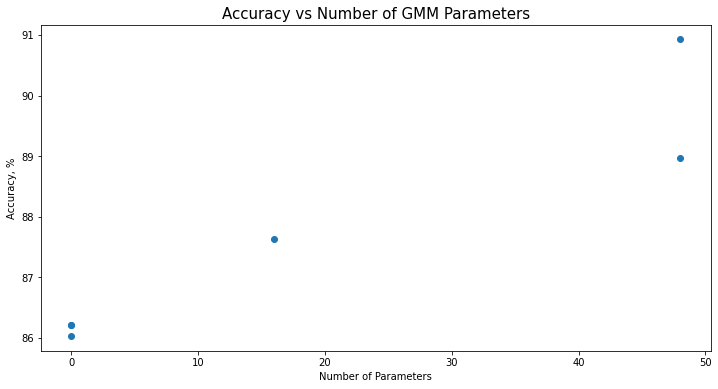

In [ ]:
from matplotlib.lines import Line2D

def Q6():
  ### STUDENT START ###
  def gaussian_prediction(covtype, num_pca, num_gmm):
  #train pca
    pca_temp = PCA(n_components=num_pca)
    main_components = pca_temp.fit_transform(train_data)
    #train test data
    test_2d = pca_temp.transform(test_data)
    #train two GMM models
    gmm_poison = GaussianMixture(n_components=num_gmm, covariance_type=covtype, random_state = 12345).fit(poison)
    gmm_nonpoison = GaussianMixture(n_components = num_gmm, covariance_type = covtype, random_state = 12345).fit(non_poison)
    prediction = []
    #create poison and non-poison accuracy arrays
    poison_scores = gmm_poison.score_samples(test_2d)
    non_poison_scores = gmm_nonpoison.score_samples(test_2d)
    #for loop to compare prediction scores. If higher for poison create label 1, if lower create label 0
    for i in range(len(poison_scores)):
      if poison_scores[i] > non_poison_scores[i]:
        prediction.append(1)
      else:
        prediction.append(0)

    #run accuracy function to test methods
    print('accuracy with cov type ' + str(cov) +' and #pca '+ str(pca) +' and #gmm ' + str(gmm))
    return accuracy(prediction)
    prediction.clear
  
  #create prediction list
  prediction = []
  #use subsets to make two Gaussian mixture models
  gmm_poison = GaussianMixture(n_components=4, covariance_type='full', random_state = 12345).fit(poison)
  gmm_nonpoison = GaussianMixture(n_components = 4, covariance_type = 'full', random_state = 12345).fit(non_poison)
  #create number of classes to estimate number of parameters
  num_classes = 2
  num_pca = [2]
  num_gmm = [1,2,3]
  cov_type = ['full', 'diag', 'spherical','tied']
  comp_weights = 2
  #create two lists to track number of parameters and accuracy
  num_para = []
  accuracy_list = []
  parameters = 0
  #start by looping through cov type
  for cov in cov_type:
    for pca in num_pca:
      for gmm in num_gmm:
        #parameter values
        mean_vectors = pca*gmm
        comp_weights = gmm -1
        #different calcs for matrix types
        if cov == 'full':
          covmatrix = (pca * (pca+1))/2
          cov_parameters = covmatrix * gmm
          parameters = num_classes*(mean_vectors *cov_parameters*comp_weights)
          if parameters < 50:
            print('parameters #' + str(parameters))
            num_para.append(parameters)
            #run gmm prediction function
            accuracy_list.append(gaussian_prediction(cov, pca, gmm))
        elif cov == 'diagonal':
          covmatrix = pca
          cov_parameters = covmatrix * gmm
          parameters = num_classes*(mean_vectors *cov_parameters*comp_weights)
          if parameters < 50:
            print('parameters #' + str(parameters))
            num_para.append(parameters)
            #run gmm prediction function
            accuracy_list.append(gaussian_prediction(cov, pca, gmm))
        elif cov == 'spherical':
          covmatrix = 1
          cov_parameters = covmatrix * gmm
          parameters = num_classes*(mean_vectors *cov_parameters*comp_weights)
          if parameters < 50:
            print('parameters #' + str(parameters))
            num_para.append(parameters)
            #run gmm prediction function
            accuracy_list.append(gaussian_prediction(cov, pca, gmm))
        elif cov == 'tied':
          covmatrix = pca*((pca+1)/2)
          cov_parameters = covmatrix * gmm
          parameters = num_classes*(mean_vectors *cov_parameters*comp_weights)
          if parameters < 50:
            print('parameters #' + str(parameters))
            num_para.append(parameters)
            #run gmm prediction function
            accuracy_list.append(gaussian_prediction(cov, pca, gmm))


      #reset parameter value at end of each experiment   
      parameters = 0
  plt.figure(figsize=(12, 6))
  plt.scatter(num_para, accuracy_list)
  plt.title('Accuracy vs Number of GMM Parameters', fontsize = 15)
  plt.xlabel('Number of Parameters')
  plt.ylabel('Accuracy, %')
      
  ### STUDENT END ###

Q6()